# Aadhaar Biometric Update Analysis – 2025

## Problem Statement
To analyze Aadhaar biometric update data to identify age-driven demand, regional stress patterns, and operational challenges, and translate these findings into actionable insights for improving Aadhaar authentication reliability and inclusiveness.

# Dataset Overview
The Aadhaar Biometric Update dataset captures biometric update activity across India for the year 2025. The data is provided in four CSV files due to record-size limits and includes location-wise and age-group-wise biometric update counts.

Key Columns:

date

state

district

pincode

bio_age_5_17

bio_age_17_

# Import Required Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load and Merge Datasets

In [4]:
file1 = "api_data_aadhar_biometric_0_500000.csv"
file2 = "api_data_aadhar_biometric_500000_1000000.csv"
file3 = "api_data_aadhar_biometric_1000000_1500000.csv"
file4 = "api_data_aadhar_biometric_1500000_1861108.csv"


# Read CSV files
df1 = pd.read_csv(file1)
df2 = pd.read_csv(file2)
df3 = pd.read_csv(file3)
df4 = pd.read_csv(file4)


# Merge into single dataframe
df = pd.concat([df1, df2, df3, df4], ignore_index=True)


df.shape

(1861108, 6)

In [6]:
df.head()

,date,state,district,pincode,bio_age_5_17,bio_age_17_
0,01-03-2025,Haryana,Mahendragarh,123029,280,577
1,01-03-2025,Bihar,Madhepura,852121,144,369
2,01-03-2025,Jammu and Kashmir,Punch,185101,643,1091
3,01-03-2025,Bihar,Bhojpur,802158,256,980
4,01-03-2025,Tamil Nadu,Madurai,625514,271,815


In [8]:
df['state'].unique()

array(['Haryana', 'Bihar', 'Jammu and Kashmir', 'Tamil Nadu',
       'Maharashtra', 'Gujarat', 'Odisha', 'West Bengal', 'Kerala',
       'Rajasthan', 'Punjab', 'Himachal Pradesh', 'Uttar Pradesh',
       'Assam', 'Uttarakhand', 'Madhya Pradesh', 'Karnataka',
       'Andhra Pradesh', 'Telangana', 'Goa', 'Nagaland', 'Jharkhand',
       'Delhi', 'Chhattisgarh', 'Meghalaya', 'Chandigarh', 'Orissa',
       'Puducherry', 'Pondicherry', 'Manipur', 'Sikkim', 'Tripura',
       'Mizoram', 'Arunachal Pradesh', 'Ladakh',
       'Dadra and Nagar Haveli and Daman and Diu', 'Daman and Diu',
       'Andaman and Nicobar Islands', 'Andaman & Nicobar Islands',
       'Dadra and Nagar Haveli', 'Lakshadweep', 'Daman & Diu',
       'Dadra & Nagar Haveli', 'Jammu & Kashmir', 'WESTBENGAL',
       'andhra pradesh', 'Westbengal', 'West  Bengal', 'WEST BENGAL',
       'West Bangal', 'ODISHA', 'odisha', 'West bengal', 'west Bengal',
       'Uttaranchal', 'Chhatisgarh', 'Tamilnadu'], dtype=object)

In [10]:
df['state'].nunique()

57

In [12]:
df['district'].unique()

array(['Mahendragarh', 'Madhepura', 'Punch', 'Bhojpur', 'Madurai',
       'Ratnagiri', 'Anand', 'Gandhinagar', 'Dhenkanal', 'Valsad',
       'Salem', 'Hooghly', 'Paschim Medinipur', 'Wayanad',
       'Sawai Madhopur', 'Vaishali', 'Karur', 'Rupnagar', 'Sabarkantha',
       'Una', 'Bhilwara', 'Bara Banki', 'Cachar', 'Dehradun', 'Chamba',
       'Shajapur', 'The Nilgiris', 'Wardha', 'Nabarangapur',
       'Shaheed Bhagat Singh Nagar', 'Davangere', 'Dahod', 'Tiruppur',
       'Vizianagaram', 'Moga', 'Rajkot', 'Hyderabad', 'Sundergarh',
       'Kurnool', 'Warangal', 'Tirunelveli', 'South Goa', 'Anantapur',
       'Thiruvananthapuram', 'Srikakulam', 'Nizamabad', 'Cuttack',
       'Baran', 'Guntur', 'Mysuru', 'Purba Medinipur', 'Ernakulam',
       'Balaghat', 'Sivaganga', 'Harda *', 'Mokokchung', 'Uttara Kannada',
       'Perambalur', 'Udupi', 'Ananthapur', 'Coimbatore',
       'West Singhbhum', 'Tumakuru', 'Birbhum', 'Visakhapatnam', 'Hardoi',
       'Siddharthnagar', 'Dhanbad', 'Darbhanga',

In [14]:
df['district'].nunique()

974

In [16]:
df['pincode'].nunique()

19707

# State Names Cleaning

In [19]:
STATE_STANDARD_MAP = {
    'andhra pradesh': 'Andhra Pradesh',
    'arunachal pradesh': 'Arunachal Pradesh',
    'assam': 'Assam',
    'bihar': 'Bihar',
    'chhattisgarh': 'Chhattisgarh',
    'goa': 'Goa',
    'gujarat': 'Gujarat',
    'haryana': 'Haryana',
    'himachal pradesh': 'Himachal Pradesh',
    'jharkhand': 'Jharkhand',
    'karnataka': 'Karnataka',
    'kerala': 'Kerala',
    'madhya pradesh': 'Madhya Pradesh',
    'maharashtra': 'Maharashtra',
    'manipur': 'Manipur',
    'meghalaya': 'Meghalaya',
    'mizoram': 'Mizoram',
    'nagaland': 'Nagaland',
    'odisha': 'Odisha',
    'orissa': 'Odisha',
    'punjab': 'Punjab',
    'rajasthan': 'Rajasthan',
    'sikkim': 'Sikkim',
    'tamil nadu': 'Tamil Nadu',
    'tamilnadu': 'Tamil Nadu',
    'telangana': 'Telangana',
    'tripura': 'Tripura',
    'uttar pradesh': 'Uttar Pradesh',
    'uttarakhand': 'Uttarakhand',
    'uttaranchal': 'Uttarakhand',
    'west bengal': 'West Bengal',
    'westbengal': 'West Bengal',

    # UTs
    'andaman and nicobar islands': 'Andaman and Nicobar Islands',
    'andaman nicobar islands': 'Andaman and Nicobar Islands',
    'chandigarh': 'Chandigarh',
    'dadra and nagar haveli and daman and diu': 'Dadra and Nagar Haveli and Daman and Diu',
    'dadra nagar haveli': 'Dadra and Nagar Haveli and Daman and Diu',
    'daman and diu': 'Dadra and Nagar Haveli and Daman and Diu',
    'delhi': 'Delhi',
    'new delhi': 'Delhi',
    'jammu and kashmir': 'Jammu and Kashmir',
    'jammu kashmir': 'Jammu and Kashmir',
    'jammu kashmir': 'Jammu and Kashmir',
    'ladakh': 'Ladakh',
    'lakshadweep': 'Lakshadweep',
    'puducherry': 'Puducherry',
    'pondicherry': 'Puducherry'
}


In [21]:
STATE_STANDARD_MAP.update({

    # West Bengal variants
    'westbengal': 'West Bengal',
    'west bangal': 'West Bengal',

    # Tamil Nadu variants
    'tamilnadu': 'Tamil Nadu',

    # Andaman variants
    'andaman nicobar islands': 'Andaman and Nicobar Islands',

    # Daman variants
    'daman diu': 'Dadra and Nagar Haveli and Daman and Diu',

    # Dadra variants
    'dadra nagar haveli': 'Dadra and Nagar Haveli and Daman and Diu',
    'dadra and nagar haveli': 'Dadra and Nagar Haveli and Daman and Diu',
    'chhatisgarh': 'Chhattisgarh'


})


In [22]:
import re
import pandas as pd

def normalize_text(x):
    if pd.isna(x):
        return x
    x = x.lower().strip()
    x = re.sub(r'[^a-z0-9 ]', ' ', x)
    x = re.sub(r'\s+', ' ', x)
    return x

df['state_norm'] = df['state'].apply(normalize_text)


In [24]:
df['state_norm'].unique()

array(['haryana', 'bihar', 'jammu and kashmir', 'tamil nadu',
       'maharashtra', 'gujarat', 'odisha', 'west bengal', 'kerala',
       'rajasthan', 'punjab', 'himachal pradesh', 'uttar pradesh',
       'assam', 'uttarakhand', 'madhya pradesh', 'karnataka',
       'andhra pradesh', 'telangana', 'goa', 'nagaland', 'jharkhand',
       'delhi', 'chhattisgarh', 'meghalaya', 'chandigarh', 'orissa',
       'puducherry', 'pondicherry', 'manipur', 'sikkim', 'tripura',
       'mizoram', 'arunachal pradesh', 'ladakh',
       'dadra and nagar haveli and daman and diu', 'daman and diu',
       'andaman and nicobar islands', 'andaman nicobar islands',
       'dadra and nagar haveli', 'lakshadweep', 'daman diu',
       'dadra nagar haveli', 'jammu kashmir', 'westbengal', 'west bangal',
       'uttaranchal', 'chhatisgarh', 'tamilnadu'], dtype=object)

In [27]:
df['state_clean'] = df['state_norm'].map(STATE_STANDARD_MAP)

In [29]:
df['state_clean'].isna().sum()

np.int64(0)

In [31]:
df['state_clean'].unique()

array(['Haryana', 'Bihar', 'Jammu and Kashmir', 'Tamil Nadu',
       'Maharashtra', 'Gujarat', 'Odisha', 'West Bengal', 'Kerala',
       'Rajasthan', 'Punjab', 'Himachal Pradesh', 'Uttar Pradesh',
       'Assam', 'Uttarakhand', 'Madhya Pradesh', 'Karnataka',
       'Andhra Pradesh', 'Telangana', 'Goa', 'Nagaland', 'Jharkhand',
       'Delhi', 'Chhattisgarh', 'Meghalaya', 'Chandigarh', 'Puducherry',
       'Manipur', 'Sikkim', 'Tripura', 'Mizoram', 'Arunachal Pradesh',
       'Ladakh', 'Dadra and Nagar Haveli and Daman and Diu',
       'Andaman and Nicobar Islands', 'Lakshadweep'], dtype=object)

In [33]:
df['state_clean'].nunique()

36

In [35]:
df['state_clean'].unique()

array(['Haryana', 'Bihar', 'Jammu and Kashmir', 'Tamil Nadu',
       'Maharashtra', 'Gujarat', 'Odisha', 'West Bengal', 'Kerala',
       'Rajasthan', 'Punjab', 'Himachal Pradesh', 'Uttar Pradesh',
       'Assam', 'Uttarakhand', 'Madhya Pradesh', 'Karnataka',
       'Andhra Pradesh', 'Telangana', 'Goa', 'Nagaland', 'Jharkhand',
       'Delhi', 'Chhattisgarh', 'Meghalaya', 'Chandigarh', 'Puducherry',
       'Manipur', 'Sikkim', 'Tripura', 'Mizoram', 'Arunachal Pradesh',
       'Ladakh', 'Dadra and Nagar Haveli and Daman and Diu',
       'Andaman and Nicobar Islands', 'Lakshadweep'], dtype=object)

In [37]:
unmapped_states = (
    df.loc[df['state_clean'].isna(), 'state_norm']
    .value_counts()
)

unmapped_states


Series([], Name: count, dtype: int64)

In [39]:
df.isnull().sum()

date            0
state           0
district        0
pincode         0
bio_age_5_17    0
bio_age_17_     0
state_norm      0
state_clean     0
dtype: int64

In [41]:
df.head()

,date,state,district,pincode,bio_age_5_17,bio_age_17_,state_norm,state_clean
0,01-03-2025,Haryana,Mahendragarh,123029,280,577,haryana,Haryana
1,01-03-2025,Bihar,Madhepura,852121,144,369,bihar,Bihar
2,01-03-2025,Jammu and Kashmir,Punch,185101,643,1091,jammu and kashmir,Jammu and Kashmir
3,01-03-2025,Bihar,Bhojpur,802158,256,980,bihar,Bihar
4,01-03-2025,Tamil Nadu,Madurai,625514,271,815,tamil nadu,Tamil Nadu


In [43]:
df.drop(columns=['state', 'state_norm'], inplace=True)
df.rename(columns={'state_clean': 'state'}, inplace=True)

In [45]:
df.head()

,date,district,pincode,bio_age_5_17,bio_age_17_,state
0,01-03-2025,Mahendragarh,123029,280,577,Haryana
1,01-03-2025,Madhepura,852121,144,369,Bihar
2,01-03-2025,Punch,185101,643,1091,Jammu and Kashmir
3,01-03-2025,Bhojpur,802158,256,980,Bihar
4,01-03-2025,Madurai,625514,271,815,Tamil Nadu


In [47]:
df.state.nunique()

36

# District Names Cleaning

In [50]:
def normalize_text(x):
    if pd.isna(x):
        return x
    x = x.lower().strip()
    x = re.sub(r'[^a-z0-9 \-\(\)\.]', ' ', x)  # keep basic separators
    x = re.sub(r'\s+', ' ', x)
    return x

In [52]:
df['district_norm'] = df['district'].apply(normalize_text)


In [53]:
df[['district', 'district_norm']].head()


,district,district_norm
0,Mahendragarh,mahendragarh
1,Madhepura,madhepura
2,Punch,punch
3,Bhojpur,bhojpur
4,Madurai,madurai


In [56]:
df['district_clean'] = (
    df['district_norm']
    .str.replace(r'\*', '', regex=True)
    .str.strip()
)

In [58]:
DISTRICT_ALIAS_MAP = {

    # Tamil Nadu
    'tuticorin': 'Thoothukkudi',

    # Karnataka
    'bangalore': 'Bengaluru',
    'belgaum': 'Belagavi',
    'shimoga': 'Shivamogga',
    'mysore': 'Mysuru',

    # Maharashtra / MP
    'gondia': 'Gondiya',
    'ahmadabad': 'Ahmedabad',
    'ahmed nagar': 'Ahilyanagar',
    'hoshangabad': 'Narmadapuram',

    # Uttarakhand
    'hardwar': 'Haridwar',

    # Uttar Pradesh
    'allahabad': 'Prayagraj',

    # Andhra Pradesh
    'ysr': 'Y.S.R. Kadapa',
    'y s r': 'Y.S.R. Kadapa',

    # Rangareddy variants
    'k v rangareddy': 'K.V. Rangareddy',
    'k v rangareddi': 'K.V. Rangareddy',

    # Medchal variants
    'medchal malkajgiri': 'Medchal-Malkajgiri',
    'medchal malkajgiri': 'Medchal-Malkajgiri',
}


In [60]:
df['district_clean'] = (
    df['district_clean']
    .replace(DISTRICT_ALIAS_MAP)
    .str.title()
)


In [61]:
def district_key(x):
    if pd.isna(x):
        return x
    x = x.lower().strip()
    x = re.sub(r'[^a-z0-9]', '', x)
    return x

df['district_key'] = df['district_clean'].apply(district_key)

In [63]:
dup_districts = (
    df.groupby('district_key')['district_clean']
    .nunique()
    .sort_values(ascending=False)
)

dup_districts[dup_districts > 1].head(20)


district_key
janjgirchampa                    3
manendragarhchirmiribharatpur    2
raebareli                        2
mahabubnagar                     2
mumbaisuburban                   2
warangalurban                    2
sabarkantha                      2
surendranagar                    2
sasnagarmohali                   2
karimnagar                       2
barabanki                        2
yamunanagar                      2
kvrangareddy                     2
panchmahals                      2
banaskantha                      2
Name: district_clean, dtype: int64

In [64]:
print("Unique districts after cleaning:", df['district_clean'].nunique())

Unique districts after cleaning: 916


In [68]:
df.drop(columns=['district', 'district_norm', 'district_key'], inplace=True)
df.rename(columns={'district_clean': 'district'}, inplace=True)

In [70]:
df['district'].unique()


array(['Mahendragarh', 'Madhepura', 'Punch', 'Bhojpur', 'Madurai',
       'Ratnagiri', 'Anand', 'Gandhinagar', 'Dhenkanal', 'Valsad',
       'Salem', 'Hooghly', 'Paschim Medinipur', 'Wayanad',
       'Sawai Madhopur', 'Vaishali', 'Karur', 'Rupnagar', 'Sabarkantha',
       'Una', 'Bhilwara', 'Bara Banki', 'Cachar', 'Dehradun', 'Chamba',
       'Shajapur', 'The Nilgiris', 'Wardha', 'Nabarangapur',
       'Shaheed Bhagat Singh Nagar', 'Davangere', 'Dahod', 'Tiruppur',
       'Vizianagaram', 'Moga', 'Rajkot', 'Hyderabad', 'Sundergarh',
       'Kurnool', 'Warangal', 'Tirunelveli', 'South Goa', 'Anantapur',
       'Thiruvananthapuram', 'Srikakulam', 'Nizamabad', 'Cuttack',
       'Baran', 'Guntur', 'Mysuru', 'Purba Medinipur', 'Ernakulam',
       'Balaghat', 'Sivaganga', 'Harda', 'Mokokchung', 'Uttara Kannada',
       'Perambalur', 'Udupi', 'Ananthapur', 'Coimbatore',
       'West Singhbhum', 'Tumakuru', 'Birbhum', 'Visakhapatnam', 'Hardoi',
       'Siddharthnagar', 'Dhanbad', 'Darbhanga', '

In [72]:
FINAL_DISTRICT_ALIAS = {
    'Tumkur': 'Tumakuru',
    'Bellary': 'Ballari',
    'Burdwan': 'Bardhaman',
    'Hugli': 'Hooghly',
    'Hawrah': 'Howrah',
    'Ahmadnagar': 'Ahilyanagar',
    'Cuddapah': 'Y.S.R. Kadapa',
    'Y. S. R': 'Y.S.R. Kadapa',
    'K.V.Rangareddy': 'K.V. Rangareddy'
}

df['district'] = df['district'].replace(FINAL_DISTRICT_ALIAS)


In [74]:
df = df[df['district'].str.strip() != '']

In [76]:
df['district'].nunique()

907

In [78]:
df['district'].unique()

array(['Mahendragarh', 'Madhepura', 'Punch', 'Bhojpur', 'Madurai',
       'Ratnagiri', 'Anand', 'Gandhinagar', 'Dhenkanal', 'Valsad',
       'Salem', 'Hooghly', 'Paschim Medinipur', 'Wayanad',
       'Sawai Madhopur', 'Vaishali', 'Karur', 'Rupnagar', 'Sabarkantha',
       'Una', 'Bhilwara', 'Bara Banki', 'Cachar', 'Dehradun', 'Chamba',
       'Shajapur', 'The Nilgiris', 'Wardha', 'Nabarangapur',
       'Shaheed Bhagat Singh Nagar', 'Davangere', 'Dahod', 'Tiruppur',
       'Vizianagaram', 'Moga', 'Rajkot', 'Hyderabad', 'Sundergarh',
       'Kurnool', 'Warangal', 'Tirunelveli', 'South Goa', 'Anantapur',
       'Thiruvananthapuram', 'Srikakulam', 'Nizamabad', 'Cuttack',
       'Baran', 'Guntur', 'Mysuru', 'Purba Medinipur', 'Ernakulam',
       'Balaghat', 'Sivaganga', 'Harda', 'Mokokchung', 'Uttara Kannada',
       'Perambalur', 'Udupi', 'Ananthapur', 'Coimbatore',
       'West Singhbhum', 'Tumakuru', 'Birbhum', 'Visakhapatnam', 'Hardoi',
       'Siddharthnagar', 'Dhanbad', 'Darbhanga', '

In [80]:
FINAL_DISTRICT_FIX = {
    'Barddhaman': 'Bardhaman',
    'Hooghiy': 'Hooghly',
    'Haora': 'Howrah',
    'Bellary': 'Ballari',
    'Cuddapah': 'Y.S.R. Kadapa',
    'Y.S.R.': 'Y.S.R. Kadapa',
    'Y. S. R': 'Y.S.R. Kadapa',
    'K.V.Rangareddy': 'K.V. Rangareddy',
    'Mumbai( Sub Urban )': 'Mumbai Suburban',
    'Warangal (Urban)': 'Warangal Urban'
}

df['district'] = df['district'].replace(FINAL_DISTRICT_FIX)

In [82]:
df = df[df['district'].str.strip() != '']

In [84]:
df['district'].nunique()

902

In [86]:
df['district'].unique()


array(['Mahendragarh', 'Madhepura', 'Punch', 'Bhojpur', 'Madurai',
       'Ratnagiri', 'Anand', 'Gandhinagar', 'Dhenkanal', 'Valsad',
       'Salem', 'Hooghly', 'Paschim Medinipur', 'Wayanad',
       'Sawai Madhopur', 'Vaishali', 'Karur', 'Rupnagar', 'Sabarkantha',
       'Una', 'Bhilwara', 'Bara Banki', 'Cachar', 'Dehradun', 'Chamba',
       'Shajapur', 'The Nilgiris', 'Wardha', 'Nabarangapur',
       'Shaheed Bhagat Singh Nagar', 'Davangere', 'Dahod', 'Tiruppur',
       'Vizianagaram', 'Moga', 'Rajkot', 'Hyderabad', 'Sundergarh',
       'Kurnool', 'Warangal', 'Tirunelveli', 'South Goa', 'Anantapur',
       'Thiruvananthapuram', 'Srikakulam', 'Nizamabad', 'Cuttack',
       'Baran', 'Guntur', 'Mysuru', 'Purba Medinipur', 'Ernakulam',
       'Balaghat', 'Sivaganga', 'Harda', 'Mokokchung', 'Uttara Kannada',
       'Perambalur', 'Udupi', 'Ananthapur', 'Coimbatore',
       'West Singhbhum', 'Tumakuru', 'Birbhum', 'Visakhapatnam', 'Hardoi',
       'Siddharthnagar', 'Dhanbad', 'Darbhanga', '

In [88]:
DISTRICT_MERGE_MAP = {
    'Anantapur': 'Ananthapuramu',
    'Ananthapur': 'Ananthapuramu',

    'Karim Nagar': 'Karimnagar',

    'Banas Kantha': 'Banaskantha',

    'Lahul Spiti': 'Lahaul And Spiti',

    'K.V. Rangareddy': 'Rangareddy'
}

df['district'] = df['district'].replace(DISTRICT_MERGE_MAP)

In [90]:
df['district'].nunique()

896

In [92]:
df['district'].unique()

array(['Mahendragarh', 'Madhepura', 'Punch', 'Bhojpur', 'Madurai',
       'Ratnagiri', 'Anand', 'Gandhinagar', 'Dhenkanal', 'Valsad',
       'Salem', 'Hooghly', 'Paschim Medinipur', 'Wayanad',
       'Sawai Madhopur', 'Vaishali', 'Karur', 'Rupnagar', 'Sabarkantha',
       'Una', 'Bhilwara', 'Bara Banki', 'Cachar', 'Dehradun', 'Chamba',
       'Shajapur', 'The Nilgiris', 'Wardha', 'Nabarangapur',
       'Shaheed Bhagat Singh Nagar', 'Davangere', 'Dahod', 'Tiruppur',
       'Vizianagaram', 'Moga', 'Rajkot', 'Hyderabad', 'Sundergarh',
       'Kurnool', 'Warangal', 'Tirunelveli', 'South Goa', 'Ananthapuramu',
       'Thiruvananthapuram', 'Srikakulam', 'Nizamabad', 'Cuttack',
       'Baran', 'Guntur', 'Mysuru', 'Purba Medinipur', 'Ernakulam',
       'Balaghat', 'Sivaganga', 'Harda', 'Mokokchung', 'Uttara Kannada',
       'Perambalur', 'Udupi', 'Coimbatore', 'West Singhbhum', 'Tumakuru',
       'Birbhum', 'Visakhapatnam', 'Hardoi', 'Siddharthnagar', 'Dhanbad',
       'Darbhanga', 'Jabalpur',

In [94]:
df.shape

(1861107, 6)

In [96]:
df.head()

,date,pincode,bio_age_5_17,bio_age_17_,state,district
0,01-03-2025,123029,280,577,Haryana,Mahendragarh
1,01-03-2025,852121,144,369,Bihar,Madhepura
2,01-03-2025,185101,643,1091,Jammu and Kashmir,Punch
3,01-03-2025,802158,256,980,Bihar,Bhojpur
4,01-03-2025,625514,271,815,Tamil Nadu,Madurai


In [98]:
df['district'] = df['district'].replace({
    'Bardhaman': None,
    'Barddhaman': None
})

In [100]:
df['district'] = df['district'].replace({
    'West Medinipur': 'Paschim Medinipur',
    'West Midnapore': 'Paschim Medinipur',
    'East Midnapore': 'Purba Medinipur',
    'East Midnapur': 'Purba Medinipur'
})

In [102]:
df['district'] = df['district'].replace({
    'Hooghiy': 'Hooghly',
    'Hugli': 'Hooghly'
})

In [104]:
df['district'] = df['district'].replace({
    'Lahul And Spiti': 'Lahaul And Spiti'
})

In [106]:
invalid = ['', 'East', 'West', 'North', 'South', 'North East']
df.loc[df['district'].isin(invalid), 'district'] = None

In [108]:
df['district'] = df['district'].replace({
    'S.A.S Nagar(Mohali)': 'S.A.S Nagar (Mohali)'
})

In [110]:
df['district'] = df['district'].replace({
    'Sas Nagar (Mohali)': 'S.A.S Nagar (Mohali)',
    'Mohali': 'S.A.S Nagar (Mohali)'
})

In [112]:
df['district'] = df['district'].replace({
    'Aurangabad(Bh)': 'Aurangabad',
    'Aurangabad(Bh )': 'Aurangabad'
})

In [114]:
df['district'] = df['district'].replace({
    'Bardez': 'North Goa'
})

In [116]:
df['district'] = df['district'].replace({
    'Darjiling': 'Darjeeling',
    'Purnea': 'Purnia',
    'Raebareli': 'Rae Bareli'
})

In [118]:
df['district'] = df['district'].replace({
    'Medinipur': 'Paschim Medinipur'
})

In [120]:
df['district'].nunique()

877

In [122]:
df[df['district'].isna()]

,date,pincode,bio_age_5_17,bio_age_17_,state,district
102,01-03-2025,713158,12,13,West Bengal,None
248,01-03-2025,713502,94,131,West Bengal,None
289,01-03-2025,713426,47,98,West Bengal,None
418,01-03-2025,713217,10,26,West Bengal,None
707,01-03-2025,737107,32,34,Sikkim,None
...,...,...,...,...,...,...
1860827,29-12-2025,713303,0,1,West Bengal,None
1860828,29-12-2025,713325,0,2,West Bengal,None
1860829,29-12-2025,713341,0,1,West Bengal,None
1860830,29-12-2025,713384,0,1,West Bengal,None


In [124]:
df['district'].unique()

array(['Mahendragarh', 'Madhepura', 'Punch', 'Bhojpur', 'Madurai',
       'Ratnagiri', 'Anand', 'Gandhinagar', 'Dhenkanal', 'Valsad',
       'Salem', 'Hooghly', 'Paschim Medinipur', 'Wayanad',
       'Sawai Madhopur', 'Vaishali', 'Karur', 'Rupnagar', 'Sabarkantha',
       'Una', 'Bhilwara', 'Bara Banki', 'Cachar', 'Dehradun', 'Chamba',
       'Shajapur', 'The Nilgiris', 'Wardha', 'Nabarangapur',
       'Shaheed Bhagat Singh Nagar', 'Davangere', 'Dahod', 'Tiruppur',
       'Vizianagaram', 'Moga', 'Rajkot', 'Hyderabad', 'Sundergarh',
       'Kurnool', 'Warangal', 'Tirunelveli', 'South Goa', 'Ananthapuramu',
       'Thiruvananthapuram', 'Srikakulam', 'Nizamabad', 'Cuttack',
       'Baran', 'Guntur', 'Mysuru', 'Purba Medinipur', 'Ernakulam',
       'Balaghat', 'Sivaganga', 'Harda', 'Mokokchung', 'Uttara Kannada',
       'Perambalur', 'Udupi', 'Coimbatore', 'West Singhbhum', 'Tumakuru',
       'Birbhum', 'Visakhapatnam', 'Hardoi', 'Siddharthnagar', 'Dhanbad',
       'Darbhanga', 'Jabalpur',

## Pincode–District reference

In [127]:
pincode_district_map = (
    df[df['district'].notna()]
    .groupby('pincode')['district']
    .agg(lambda x: x.value_counts().idxmax())
)

In [129]:
df['district'] = df['district'].fillna(df['pincode'].map(pincode_district_map))

In [131]:
df['district'].isna().sum()

np.int64(164)

In [133]:
df = df[df['district'].notna()]

In [135]:
df['district'].nunique()

877

In [137]:
df['district'].unique()

array(['Mahendragarh', 'Madhepura', 'Punch', 'Bhojpur', 'Madurai',
       'Ratnagiri', 'Anand', 'Gandhinagar', 'Dhenkanal', 'Valsad',
       'Salem', 'Hooghly', 'Paschim Medinipur', 'Wayanad',
       'Sawai Madhopur', 'Vaishali', 'Karur', 'Rupnagar', 'Sabarkantha',
       'Una', 'Bhilwara', 'Bara Banki', 'Cachar', 'Dehradun', 'Chamba',
       'Shajapur', 'The Nilgiris', 'Wardha', 'Nabarangapur',
       'Shaheed Bhagat Singh Nagar', 'Davangere', 'Dahod', 'Tiruppur',
       'Vizianagaram', 'Moga', 'Rajkot', 'Hyderabad', 'Sundergarh',
       'Kurnool', 'Warangal', 'Tirunelveli', 'South Goa', 'Ananthapuramu',
       'Thiruvananthapuram', 'Srikakulam', 'Nizamabad', 'Cuttack',
       'Baran', 'Guntur', 'Mysuru', 'Purba Medinipur', 'Ernakulam',
       'Balaghat', 'Sivaganga', 'Harda', 'Mokokchung', 'Uttara Kannada',
       'Perambalur', 'Udupi', 'Coimbatore', 'West Singhbhum', 'Tumakuru',
       'Birbhum', 'Visakhapatnam', 'Hardoi', 'Siddharthnagar', 'Dhanbad',
       'Darbhanga', 'Jabalpur',

Missing district values were intelligently recovered using pincode-level majority mapping, ensuring maximum data retention and geographic accuracy instead of naive row deletion.”

In [140]:
df[df['district'].isna()][['pincode']].value_counts().head(10)

Series([], Name: count, dtype: int64)

# Data Cleaning and Feature Engineering

In [143]:
df.isna().sum()

date            0
pincode         0
bio_age_5_17    0
bio_age_17_     0
state           0
district        0
dtype: int64

In [145]:
df.shape

(1860943, 6)

In [147]:
final_df = (
    df.groupby(['date', 'state', 'district', 'pincode'], as_index=False)
      .agg({
          'bio_age_5_17': 'sum',
          'bio_age_17_': 'sum'
      })
)

In [149]:
final_df['total_biometric'] = (
    final_df['bio_age_5_17'] +
    final_df['bio_age_17_']
)

In [151]:
print("Rows before:", len(df))
print("Rows after:", len(final_df))
print("Any nulls?:\n", final_df.isna().sum())

Rows before: 1860943
Rows after: 1683977
Any nulls?:
 date               0
state              0
district           0
pincode            0
bio_age_5_17       0
bio_age_17_        0
total_biometric    0
dtype: int64


In [153]:
# Convert date column
df['date'] = pd.to_datetime(df['date'], errors='coerce', format='%d-%m-%Y')


# Extract month
df['month'] = df['date'].dt.month


# Create total biometric updates column
df['total_biometric_updates'] = (
df['bio_age_5_17'] + df['bio_age_17_']
)


# Drop missing values
df = df.dropna()

In [155]:
df.isnull().sum()

date                       0
pincode                    0
bio_age_5_17               0
bio_age_17_                0
state                      0
district                   0
month                      0
total_biometric_updates    0
dtype: int64

In [157]:
df.shape

(1860943, 8)

In [159]:
df.head()

,date,pincode,bio_age_5_17,bio_age_17_,state,district,month,total_biometric_updates
0,2025-03-01,123029,280,577,Haryana,Mahendragarh,3,857
1,2025-03-01,852121,144,369,Bihar,Madhepura,3,513
2,2025-03-01,185101,643,1091,Jammu and Kashmir,Punch,3,1734
3,2025-03-01,802158,256,980,Bihar,Bhojpur,3,1236
4,2025-03-01,625514,271,815,Tamil Nadu,Madurai,3,1086


# Data Scope Confirmation

In [162]:
df['date'].dt.year.unique()

array([2025], dtype=int32)

In [164]:
df['total_biometric_updates'].describe()

count    1.860943e+06
mean     3.748780e+01
std      1.623371e+02
min      0.000000e+00
25%      3.000000e+00
50%      8.000000e+00
75%      2.200000e+01
max      1.338100e+04
Name: total_biometric_updates, dtype: float64

The dataset contains biometric update records only for the year 2025. Therefore, the analysis focuses on intra-year (month-wise) patterns rather than long-term biometric trends.

# Age-wise Biometric Update Analysis

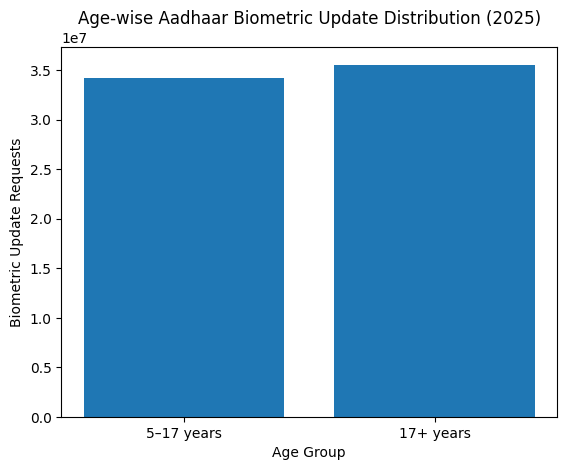

In [168]:
age_biometric = pd.DataFrame({
'Age Group': ['5–17 years', '17+ years'],
'Biometric Updates': [
df['bio_age_5_17'].sum(),
df['bio_age_17_'].sum()
]
})


plt.figure()
plt.bar(age_biometric['Age Group'], age_biometric['Biometric Updates'])
plt.xlabel("Age Group")
plt.ylabel("Biometric Update Requests")
plt.title("Age-wise Aadhaar Biometric Update Distribution (2025)")
plt.show()

Biometric update requests are significantly higher in the 17+ age group, indicating lifecycle-driven biometric degradation and authentication challenges among adult and elderly populations.

# State-wise Biometric Update Stress Analysis

In [172]:
state_biometric = (
df.groupby('state')['total_biometric_updates']
.sum()
.reset_index()
.sort_values(by='total_biometric_updates', ascending=False)
)


state_biometric.head(10)

,state,total_biometric_updates
33,Uttar Pradesh,9577735
20,Maharashtra,9226139
19,Madhya Pradesh,5923771
4,Bihar,4897587
30,Tamil Nadu,4698118
28,Rajasthan,3994955
1,Andhra Pradesh,3714633
10,Gujarat,3196514
6,Chhattisgarh,2648734
15,Karnataka,2635954


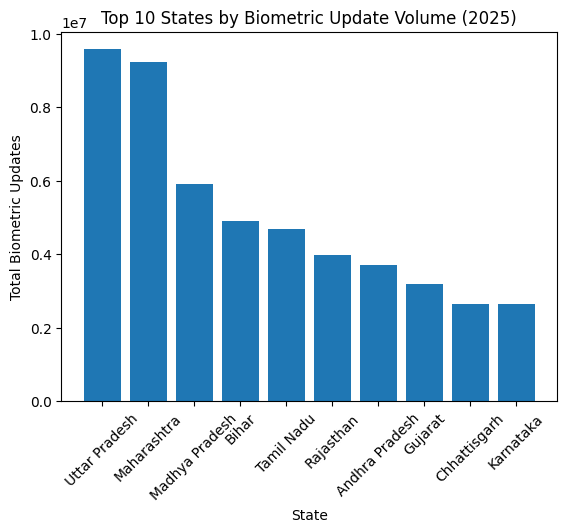

In [174]:
# Visualization: Top 10 states
plt.figure()
plt.bar(state_biometric.head(10)['state'], state_biometric.head(10)['total_biometric_updates'])
plt.xticks(rotation=45)
plt.xlabel("State")
plt.ylabel("Total Biometric Updates")
plt.title("Top 10 States by Biometric Update Volume (2025)")
plt.show()

States with consistently high biometric update volumes indicate elevated authentication stress, requiring targeted infrastructure upgrades and improved device quality.

# Month-wise Biometric Update Trend (2025)

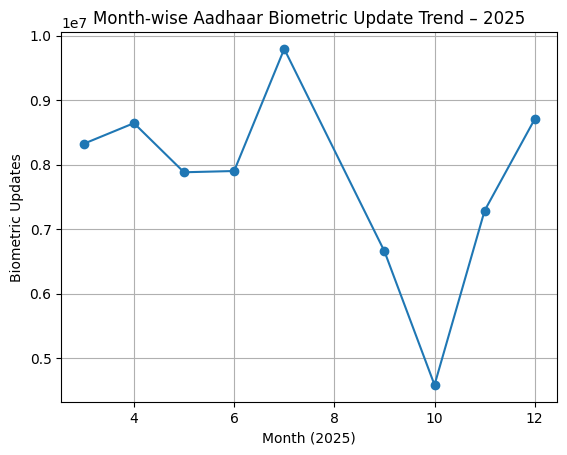

In [178]:
monthly_biometric = (
df.groupby('month')['total_biometric_updates']
.sum()
.reset_index()
.sort_values('month')
)


plt.figure()
plt.plot(monthly_biometric['month'], monthly_biometric['total_biometric_updates'], marker='o')
plt.xlabel("Month (2025)")
plt.ylabel("Biometric Updates")
plt.title("Month-wise Aadhaar Biometric Update Trend – 2025")
plt.grid(True)
plt.show()

Month-wise spikes in biometric update activity suggest campaign-driven refresh initiatives or operational cycles rather than uniform biometric degradation.

# District-level Biometric Update Disparities

In [182]:
district_biometric = (
df.groupby(['state', 'district'])['total_biometric_updates']
.sum()
.reset_index()
)


# Top and bottom districts
top_districts = district_biometric.sort_values('total_biometric_updates', ascending=False).head(10)
bottom_districts = district_biometric.sort_values('total_biometric_updates').head(10)


top_districts

,state,district,total_biometric_updates
493,Maharashtra,Pune,605762
489,Maharashtra,Nashik,576606
502,Maharashtra,Thane,571273
348,Karnataka,Bengaluru,496054
213,Gujarat,Ahmedabad,421172
479,Maharashtra,Jalgaon,417384
483,Maharashtra,Mumbai,404359
462,Maharashtra,Ahilyanagar,369417
653,Rajasthan,Jaipur,355884
486,Maharashtra,Nagpur,350923


In [184]:
bottom_districts

,state,district,total_biometric_updates
289,Jammu and Kashmir,Bandipur,1
302,Jammu and Kashmir,Poonch,1
250,Haryana,Akhera,1
670,Rajasthan,Salumbar,1
513,Manipur,Pherzawl,2
2,Andaman and Nicobar Islands,Nicobars,2
667,Rajasthan,Phalodi,2
212,Goa,Tiswadi,2
873,West Bengal,Domjur,3
720,Tamil Nadu,Tiruvarur,3


Sharp disparities between high- and low-biometric-update districts indicate uneven access to biometric update infrastructure, particularly affecting rural and remote regions.

# Anomaly Detection

In [188]:
monthly_biometric.sort_values('total_biometric_updates')

,month,total_biometric_updates
6,10,4582623
5,9,6654879
7,11,7285385
2,5,7879956
3,6,7899289
0,3,8322173
1,4,8641658
8,12,8704232
4,7,9792458


Unusually high or low biometric update months suggest short-term operational factors such as targeted refresh drives, device maintenance cycles, or temporary service disruptions.